In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy.stats as stats

sys.path.append('..')

from src.data import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Constants
PERIOD = 96

DATA_FOLDER = "../data"

In [7]:
def get_max(values, loc_x, loc_y):
  """Get the max."""
  values_loc = values[:,loc_x,loc_y]
  x = values_loc.reshape((-1, PERIOD))
  return np.max(x, axis=1)

In [12]:
values = load_data(DATA_FOLDER, 2020)

In [13]:
max_2020 = get_max(values, 200, 200)

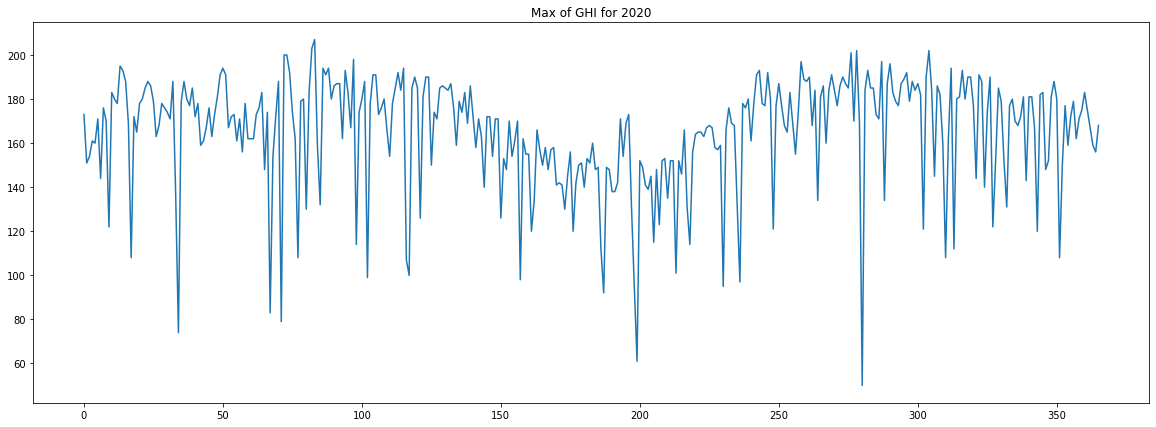

In [17]:
fig, ax = plt.subplots(figsize=(20,7))
sns.lineplot(x=range(max_2020.shape[0]), y=max_2020, ax=ax)
ax.set_title('Max of GHI for 2020');

## Try to estimate with a mean curve

In [18]:
MEAN_CURVE = values[:,200,200].reshape((-1, PERIOD)).mean(axis=0)
MEAN_CURVE /= np.max(MEAN_CURVE)
print(MEAN_CURVE.shape)

def regenerate_curve(max_val: int):
  """Regenerate the curve based on the max value."""
  return MEAN_CURVE * max_val

def plot_diff(i):
  fig, ax = plt.subplots(figsize=(15,7))
  sns.lineplot(x=range(PERIOD), y=values[i*PERIOD:(i+1)*PERIOD,200,200], ax=ax)
  sns.lineplot(x=range(PERIOD), y=regenerate_curve(max_2020[i]), ax=ax)
  

(96,)


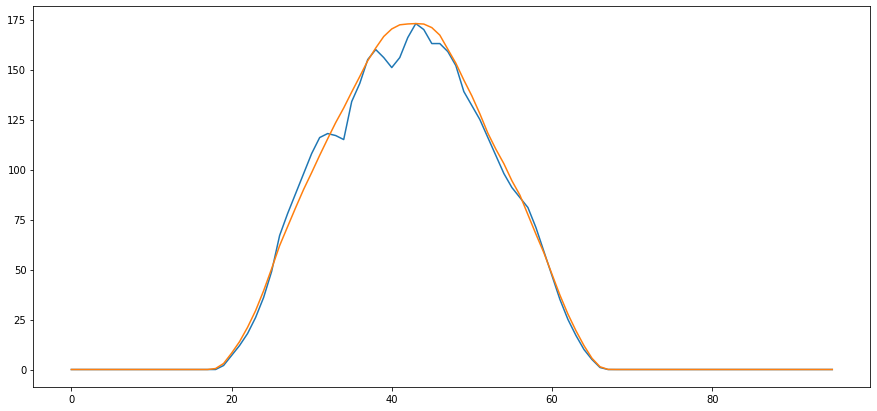

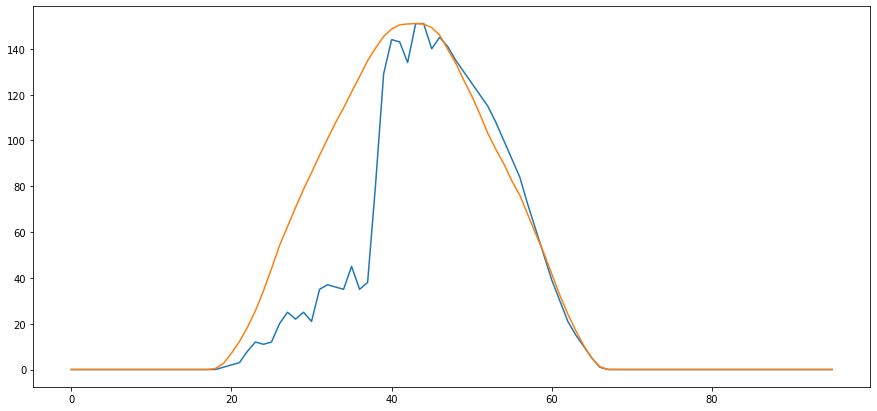

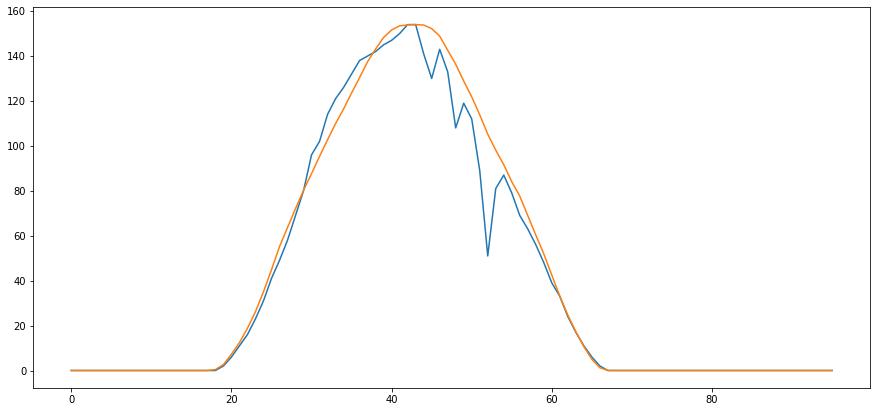

In [19]:
for i in range(3):
  plot_diff(i)

In [20]:
def compute_diff(i, loc_x =200, loc_y=200):
  real_values  = values[i*PERIOD:(i+1)*PERIOD,loc_x, loc_y]
  gen_values = regenerate_curve(real_values.max())
  return np.mean(np.sqrt((real_values - gen_values)**2))
compute_diff(0)

2.213812939862113

In [21]:
def generate_dataframe_diff(loc_x, loc_y):
  df = pd.DataFrame.from_records([{
      "year": 2020,
      "day": i,
      "month": int(i/30),
      "MSE": compute_diff(i),
      "MSE_PERCENT": compute_diff(i)/180
  } for i in range(values.shape[0]//96)
  ])
  return df
df = generate_dataframe_diff(200, 200)
df.describe()

,year,day,month,MSE,MSE_PERCENT
count,366.0,366.000000,366.000000,366.000000,366.000000
mean,2020.0,182.500000,5.606557,6.981309,0.038785
std,0.0,105.799338,3.526551,4.428687,0.024604
min,2020.0,0.000000,0.000000,1.150432,0.006391
25%,2020.0,91.250000,3.000000,3.590603,0.019948
50%,2020.0,182.500000,6.000000,5.461036,0.030339
75%,2020.0,273.750000,9.000000,9.423446,0.052352
max,2020.0,365.000000,12.000000,21.774154,0.120968


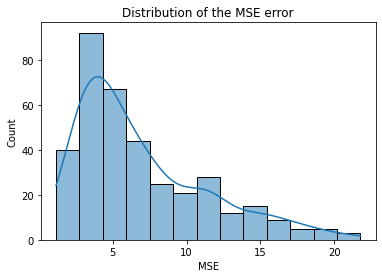

In [25]:
sns.histplot(df, x="MSE", kde=True);
plt.gca().set_title("Distribution of the MSE error");

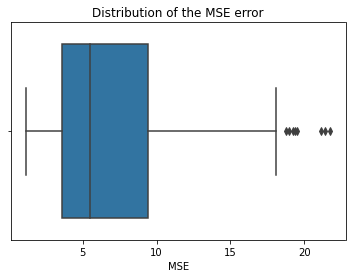

In [27]:
sns.boxplot(x=df['MSE'])
plt.gca().set_title("Distribution of the MSE error");

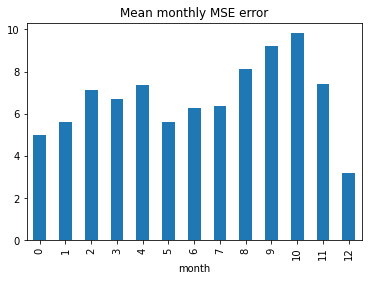

In [31]:
df.groupby(by="month").mean()['MSE'].plot.bar(title="Mean monthly MSE error");

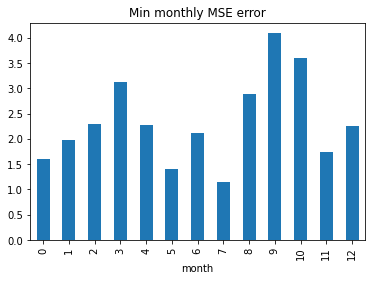

In [32]:
df.groupby(by="month").min()['MSE'].plot.bar(title="Min monthly MSE error");